# Taller 5 - Archivo de soporte

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import setuptools.dist 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Identificamos NAs en los datos

In [3]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(392, 8)

In [6]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [7]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [8]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)

In [9]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


In [ ]:
#sns.pairplot(train)

In [ ]:
#sns.heatmap(train.corr())

In [12]:
train_X = train.copy()
test_X = test.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

## Modelo Base

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
Base_h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.0816 - val_loss: 22.7961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8972 - val_loss: 22.6339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8754 - val_loss: 22.4709
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.2249 - val_loss: 22.3037
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2846 - val_loss: 22.1320
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3465 - val_loss: 21.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6417 - val_loss: 21.7826
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2482 - val_loss: 21.6010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5090 - val_loss: 21.4126
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3766 - val_loss: 21.2150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1552 - val_loss: 21.0093
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

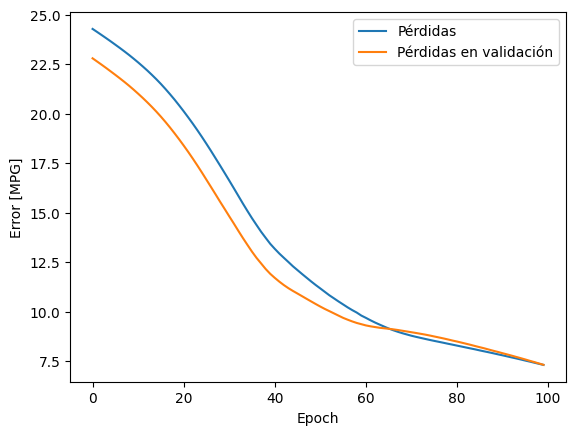

In [ ]:
plt.plot(history.history['loss'], label='Pérdidas')
plt.plot(history.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


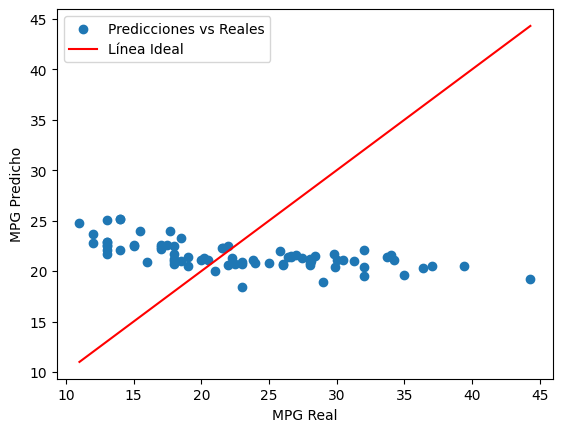

In [ ]:
y_pred = Base_h_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.legend()
plt.show()

In [ ]:
test_res = {}
test_res['Base_h_model'] = Base_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)

In [ ]:
test_res

{'Base_h_model': 7.077182769775391}

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
Base_h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.0816 - val_loss: 22.7961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8972 - val_loss: 22.6339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8754 - val_loss: 22.4709
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.2249 - val_loss: 22.3037
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2846 - val_loss: 22.1320
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3465 - val_loss: 21.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6417 - val_loss: 21.7826
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2482 - val_loss: 21.6010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5090 - val_loss: 21.4126
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3766 - val_loss: 21.2150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1552 - val_loss: 21.0093
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

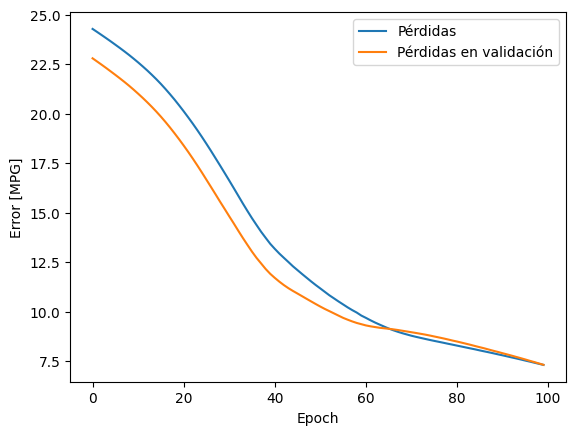

In [ ]:
plt.plot(history.history['loss'], label='Pérdidas')
plt.plot(history.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


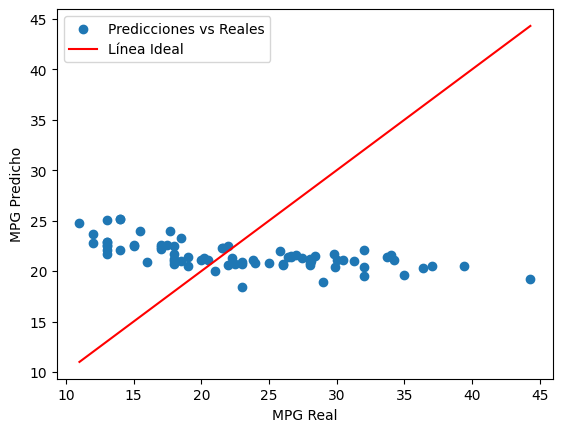

In [ ]:
y_pred = Base_h_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.legend()
plt.show()

In [ ]:
test_res = {}
test_res['Base_h_model'] = Base_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)

In [ ]:
test_res

{'Base_h_model': 7.077182769775391}

In [ ]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [ ]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
Base_h_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 24.0816 - val_loss: 22.7961
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8972 - val_loss: 22.6339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8754 - val_loss: 22.4709
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.2249 - val_loss: 22.3037
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2846 - val_loss: 22.1320
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3465 - val_loss: 21.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6417 - val_loss: 21.7826
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2482 - val_loss: 21.6010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5090 - val_loss: 21.4126
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3766 - val_loss: 21.2150
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1552 - val_loss: 21.0093
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

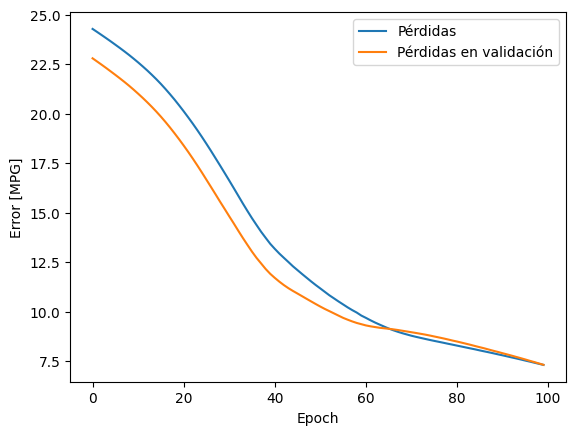

In [ ]:
plt.plot(history.history['loss'], label='Pérdidas')
plt.plot(history.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


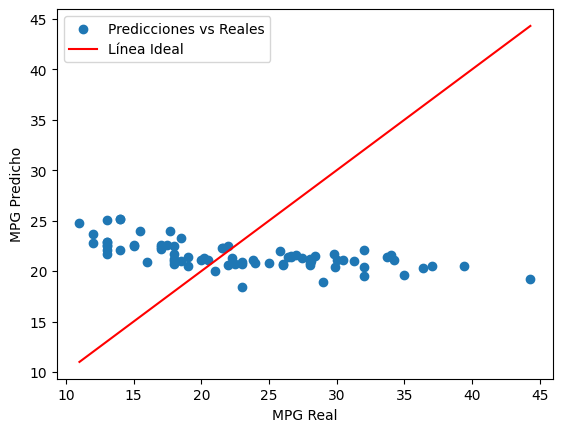

In [ ]:
y_pred = Base_h_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.legend()
plt.show()

In [ ]:
test_res = {}
test_res['Base_h_model'] = Base_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)

## Modelo Variando numero de neuronas (de la capa oculta)

In [ ]:
train_X = train.copy()
test_X = test.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [23]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
NN_1_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NN_2_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NN_3_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [25]:
NN_1_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NN_2_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NN_3_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [26]:
history_NN1 = NN_1_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NN2 = NN_2_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NN3 = NN_3_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 22.9881 - val_loss: 21.6294
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4530 - val_loss: 21.4569
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.6293 - val_loss: 21.2739
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.8208 - val_loss: 21.0794
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.7069 - val_loss: 20.8729
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.2304 - val_loss: 20.6548
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.3251 - val_loss: 20.4249
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.4792 - val_loss: 20.1829
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1093 - val_loss: 19.9286
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4056 - val_loss: 19.6609
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.2431 - val_loss: 19.3799
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

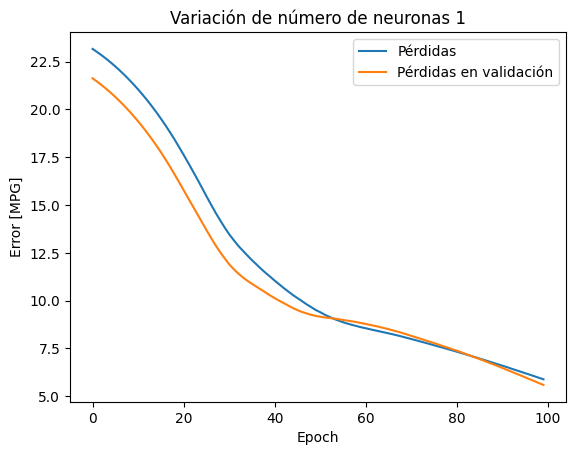

In [27]:
plt.plot(history_NN1.history['loss'], label='Pérdidas')
plt.plot(history_NN1.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 1')
plt.legend()

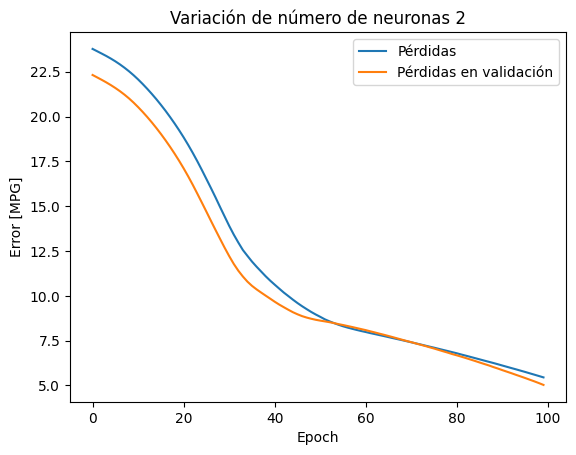

In [28]:
plt.plot(history_NN2.history['loss'], label='Pérdidas')
plt.plot(history_NN2.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 2')
plt.legend()

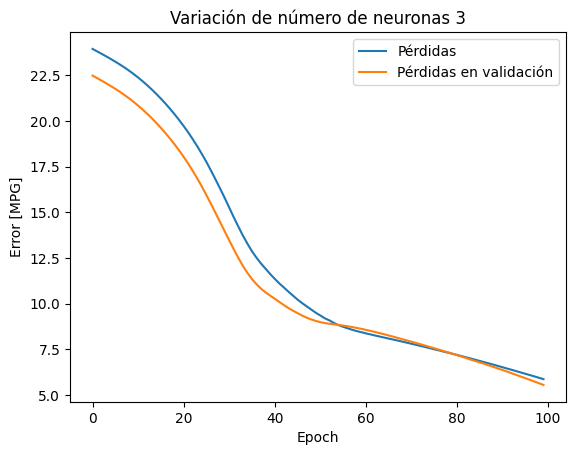

In [29]:
plt.plot(history_NN3.history['loss'], label='Pérdidas')
plt.plot(history_NN3.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de número de neuronas 3')
plt.legend()

In [ ]:
# x = tf.linspace(0.0, 250, 251).numpy()  
# x = np.tile(x[:, np.newaxis], (1, 4))   

# y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


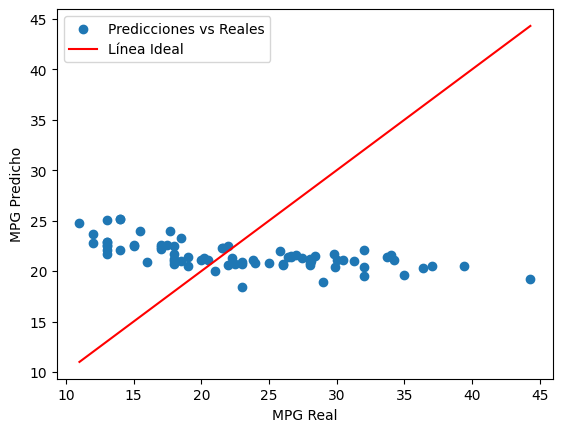

In [ ]:
# y_pred = Base_h_model.predict(test_X[Variables_exp])

# plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
# plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
# plt.xlabel("MPG Real")
# plt.ylabel("MPG Predicho")
# plt.legend()
# plt.show()

In [31]:
test_res_NN1 = {}
test_res_NN1['NN_1_h_model'] = NN_1_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN1

{'NN_1_h_model': 5.5144524574279785}

In [32]:
test_res_NN2 = {}
test_res_NN2['NN_2_h_model'] = NN_2_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN2

{'NN_2_h_model': 4.969393253326416}

In [33]:
test_res_NN3 = {}
test_res_NN3['NN_3_h_model'] = NN_3_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NN3

{'NN_3_h_model': 5.456470012664795}

## Modelo Variando numero de capas

In [17]:
train_X = train.copy()
test_X = test.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [18]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
NC_1_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NC_2_h_model = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
NC_3_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [20]:
NC_1_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NC_2_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NC_3_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [21]:
history_NC1 = NC_1_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NC2 = NC_2_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NC3 = NC_3_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 24.2570 - val_loss: 22.5517
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.9291 - val_loss: 22.4004
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.5345 - val_loss: 22.2544
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.3314 - val_loss: 22.1332
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6929 - val_loss: 22.0095
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.8863 - val_loss: 21.8680
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.9943 - val_loss: 21.6984
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.9424 - val_loss: 21.4829
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5429 - val_loss: 21.2115
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2434 - val_loss: 20.8598
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.8179 - val_loss: 20.4276
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

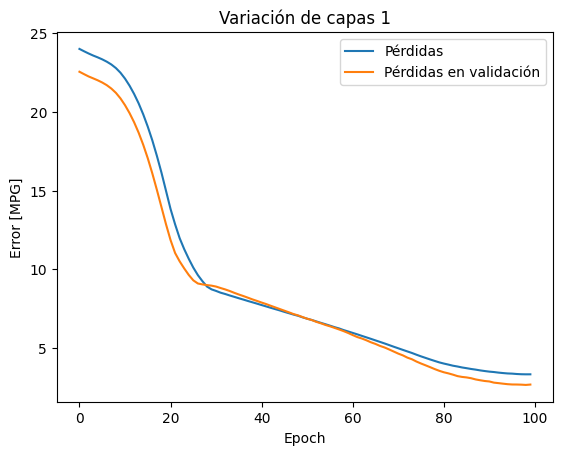

In [22]:
plt.plot(history_NC1.history['loss'], label='Pérdidas')
plt.plot(history_NC1.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de capas 1')
plt.legend()

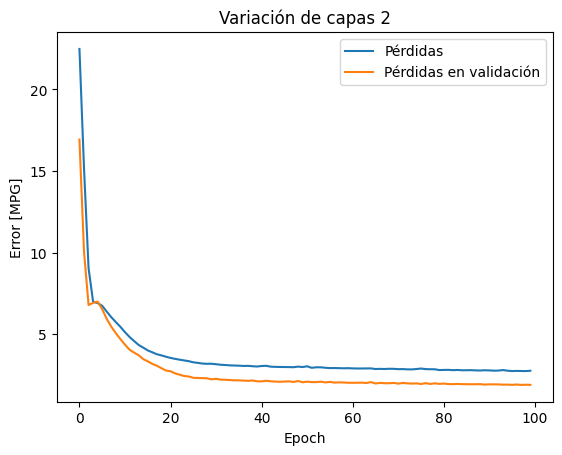

In [23]:
plt.plot(history_NC2.history['loss'], label='Pérdidas')
plt.plot(history_NC2.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de capas 2')
plt.legend()

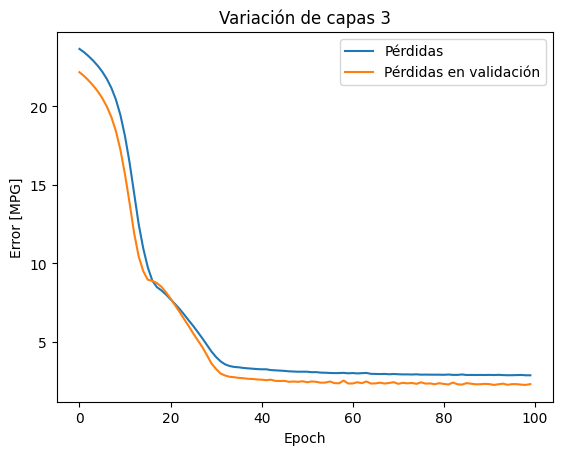

In [24]:
plt.plot(history_NC3.history['loss'], label='Pérdidas')
plt.plot(history_NC3.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de capas 3')
plt.legend()

In [ ]:
# x = tf.linspace(0.0, 250, 251).numpy()  
# x = np.tile(x[:, np.newaxis], (1, 4))   

# y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


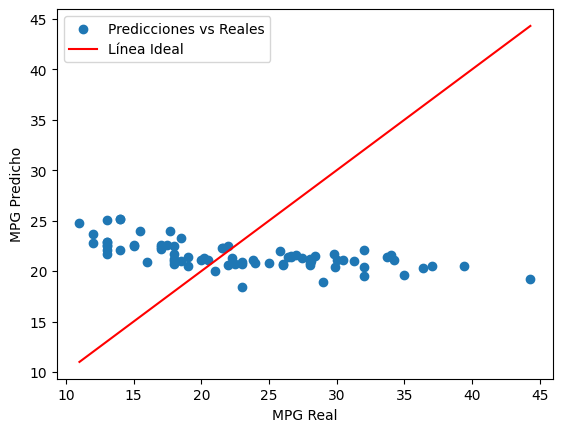

In [ ]:
# y_pred = Base_h_model.predict(test_X[Variables_exp])

# plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
# plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
# plt.xlabel("MPG Real")
# plt.ylabel("MPG Predicho")
# plt.legend()
# plt.show()

In [25]:
test_res_NC1 = {}
test_res_NC1['NC_1_h_model'] = NC_1_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NC1

{'NC_1_h_model': 3.029522657394409}

In [26]:
test_res_NC2 = {}
test_res_NC2['NC_2_h_model'] = NC_2_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NC2

{'NC_2_h_model': 2.5864503383636475}

In [27]:
test_res_NC3 = {}
test_res_NC3['NC_3_h_model'] = NC_3_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NC3

{'NC_3_h_model': 2.645050048828125}

## Modelo Variando Función de activación 

In [28]:
train_X = train.copy()
test_X = test.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [29]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
NF_1_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])
NF_2_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='tanh'),
      tf.keras.layers.Dense(1)
  ])
NF_3_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='softmax'),
      tf.keras.layers.Dense(1)
  ])

In [34]:
NF_1_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NF_2_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
NF_3_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [35]:
history_NF1 = NF_1_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NF2 = NF_2_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_NF3 = NF_3_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 23.9797 - val_loss: 21.9345
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.3199 - val_loss: 21.8339
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.8131 - val_loss: 21.7339
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.6277 - val_loss: 21.6344
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.9173 - val_loss: 21.5355
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.2127 - val_loss: 21.4370
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2745 - val_loss: 21.3389
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.6095 - val_loss: 21.2408
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.7222 - val_loss: 21.1429
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.2260 - val_loss: 21.0448
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.6785 - val_loss: 20.9465
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - l

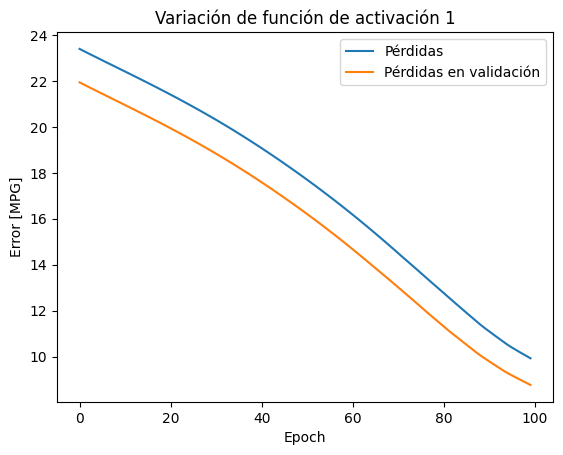

In [36]:
plt.plot(history_NF1.history['loss'], label='Pérdidas')
plt.plot(history_NF1.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de función de activación 1')
plt.legend()

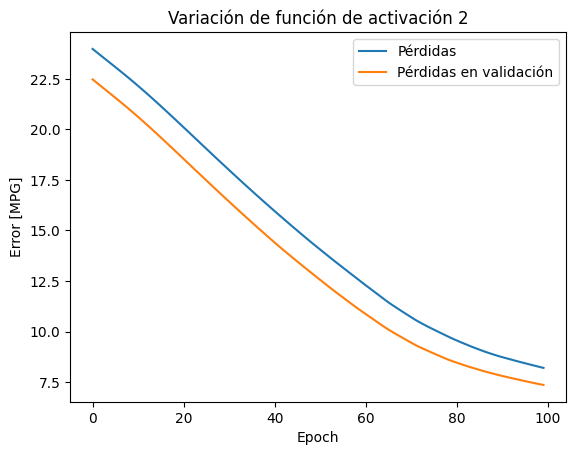

In [37]:
plt.plot(history_NF2.history['loss'], label='Pérdidas')
plt.plot(history_NF2.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de función de activación 2')
plt.legend()

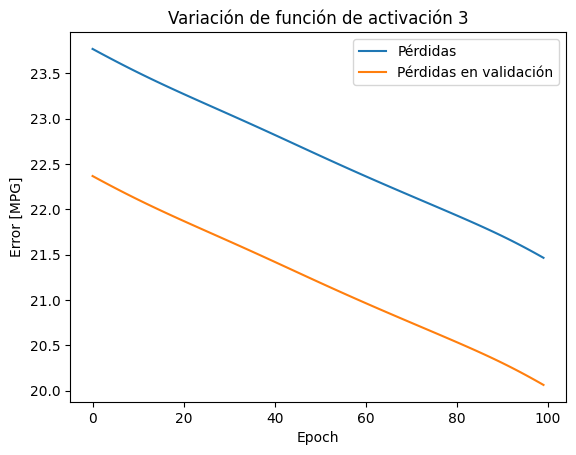

In [38]:
plt.plot(history_NF3.history['loss'], label='Pérdidas')
plt.plot(history_NF3.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación de función de activación 3')
plt.legend()

In [ ]:
# x = tf.linspace(0.0, 250, 251).numpy()  
# x = np.tile(x[:, np.newaxis], (1, 4))   

# y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


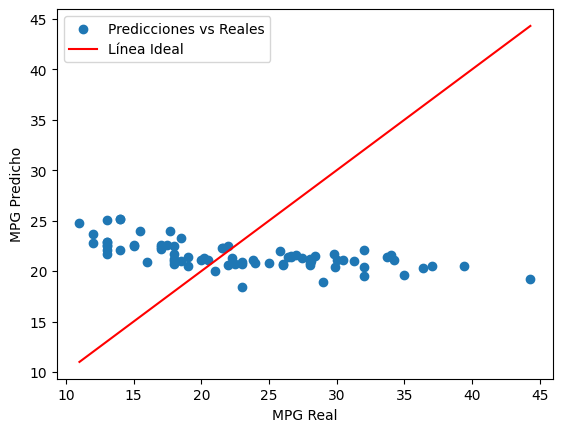

In [ ]:
# y_pred = Base_h_model.predict(test_X[Variables_exp])

# plt.scatter(test_y, y_pred, label="Predicciones vs Reales")
# plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
# plt.xlabel("MPG Real")
# plt.ylabel("MPG Predicho")
# plt.legend()
# plt.show()

In [39]:
test_res_NF1 = {}
test_res_NF1['NF_1_h_model'] = NF_1_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NF1

{'NF_1_h_model': 9.098670959472656}

In [40]:
test_res_NF2 = {}
test_res_NF2['NF_2_h_model'] = NF_2_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NF2

{'NF_2_h_model': 7.511690616607666}

In [41]:
test_res_NF3 = {}
test_res_NF3['NF_3_h_model'] = NF_3_h_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_NF3

{'NF_3_h_model': 20.49479103088379}

## Modelos finales

In [42]:
train_X = train.copy()
test_X = test.copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [43]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
A_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
B_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(1)
  ])

In [45]:
A_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
B_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [ ]:
history_A = A_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

history_B = B_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 24.2668 - val_loss: 22.7854
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.3611 - val_loss: 22.5047
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.5137 - val_loss: 22.1932
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.1460 - val_loss: 21.8537
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.1957 - val_loss: 21.4835
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.9989 - val_loss: 21.0510
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.3792 - val_loss: 20.5370
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.1990 - val_loss: 19.9235
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.8291 - val_loss: 19.1879
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.0433 - val_loss: 18.3094
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.6885 - val_loss: 17.2501
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

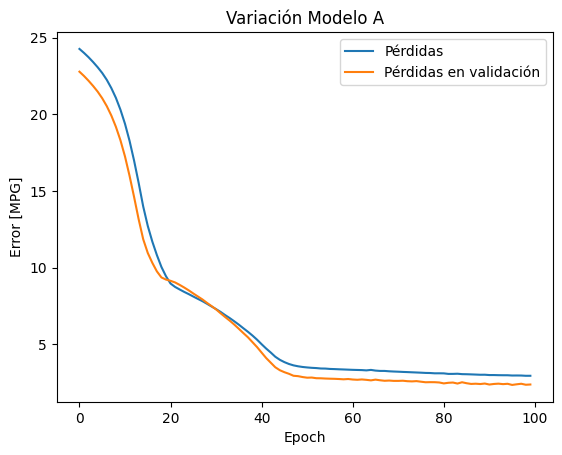

In [47]:
plt.plot(history_A.history['loss'], label='Pérdidas')
plt.plot(history_A.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación Modelo A')
plt.legend()

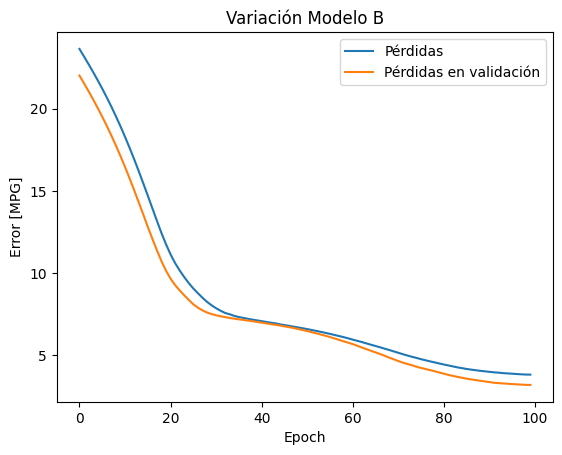

In [48]:
plt.plot(history_B.history['loss'], label='Pérdidas')
plt.plot(history_B.history['val_loss'], label='Pérdidas en validación')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Variación Modelo B')
plt.legend()

In [49]:
x = tf.linspace(0.0, 250, 251).numpy()  
x = np.tile(x[:, np.newaxis], (1, 4))   

y_a = A_model.predict(x)
y_b = B_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


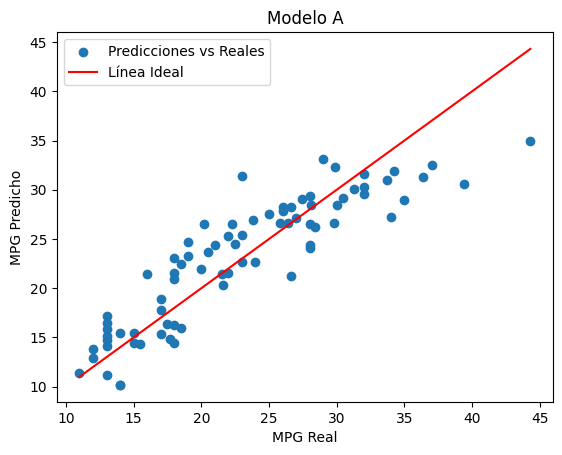

In [51]:
y_pred_a = A_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred_a, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.title('Modelo A')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


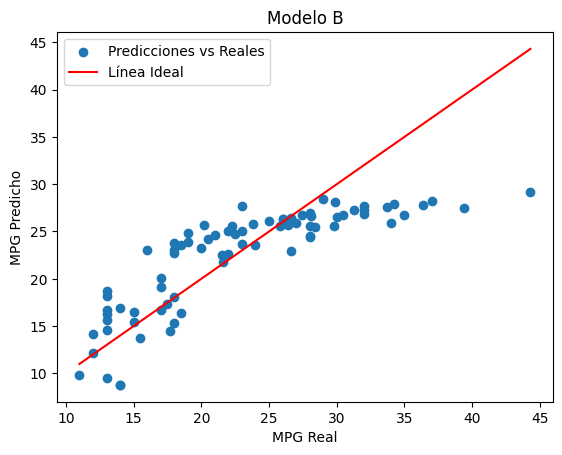

In [52]:
y_pred_b = B_model.predict(test_X[Variables_exp])

plt.scatter(test_y, y_pred_b, label="Predicciones vs Reales")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r', label="Línea Ideal")
plt.xlabel("MPG Real")
plt.ylabel("MPG Predicho")
plt.title('Modelo B')
plt.legend()
plt.show()

In [53]:
test_res_A = {}
test_res_A['A_model'] = A_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_A

{'A_model': 2.7397878170013428}

In [54]:
test_res_B = {}
test_res_B['B_model'] = B_model.evaluate(
    test_X[Variables_exp],
    test_y,
    verbose=0
)
test_res_B

{'B_model': 3.3712189197540283}